In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/yimengye/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
train_csv = pd.read_csv("train_data.csv")
validation_csv = pd.read_csv("validation_data.csv")
test_csv = pd.read_csv("test_data.csv")
# Concatenate the DataFrames
combined_df = pd.concat([train_csv, validation_csv, test_csv], ignore_index=True)


combined_df.to_csv("combined_data.csv", index=False)


In [11]:
data = combined_df

# Display the first few rows of the dataframe
print(data.head())

# Summary of the dataset
data_info = data.info()
data_description = data.describe()

print(data_info)
print(data_description)

  school  failures  Dalc  Walc  absences  Avg Grade of 3 Period 
0     GP         0     1     1         6                5.666667
1     GP         0     1     1         4                5.333333
2     GP         3     2     3        10                8.333333
3     GP         0     1     1         2               14.666667
4     GP         0     1     2         4                8.666667
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school                  395 non-null    object 
 1   failures                395 non-null    int64  
 2   Dalc                    395 non-null    int64  
 3   Walc                    395 non-null    int64  
 4   absences                395 non-null    int64  
 5   Avg Grade of 3 Period   395 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 18.6+ KB
None
         failu

school: This is a categorical column, indicating the school of the student.
failures: Number of past class failures. The values range from 0 to 3.
Dalc: workday alcohol consumption, ranging from 1 to 5.
Walc: weekend alcohol consumption, also ranging from 1 to 5.
absences: Number of school absences, ranging from 0 to 75.
Avg Grade of 3 Period: The average grade over 3 periods, ranging from about 1.33 to 19.33.

failures: Mean = 0.334, Std = 0.744
Dalc: Mean = 1.481, Std = 0.891
Walc: Mean = 2.291, Std = 1.288
absences: Mean = 5.709, Std = 8.003
Avg Grade of 3 Period: Mean = 10.679, Std = 3.697

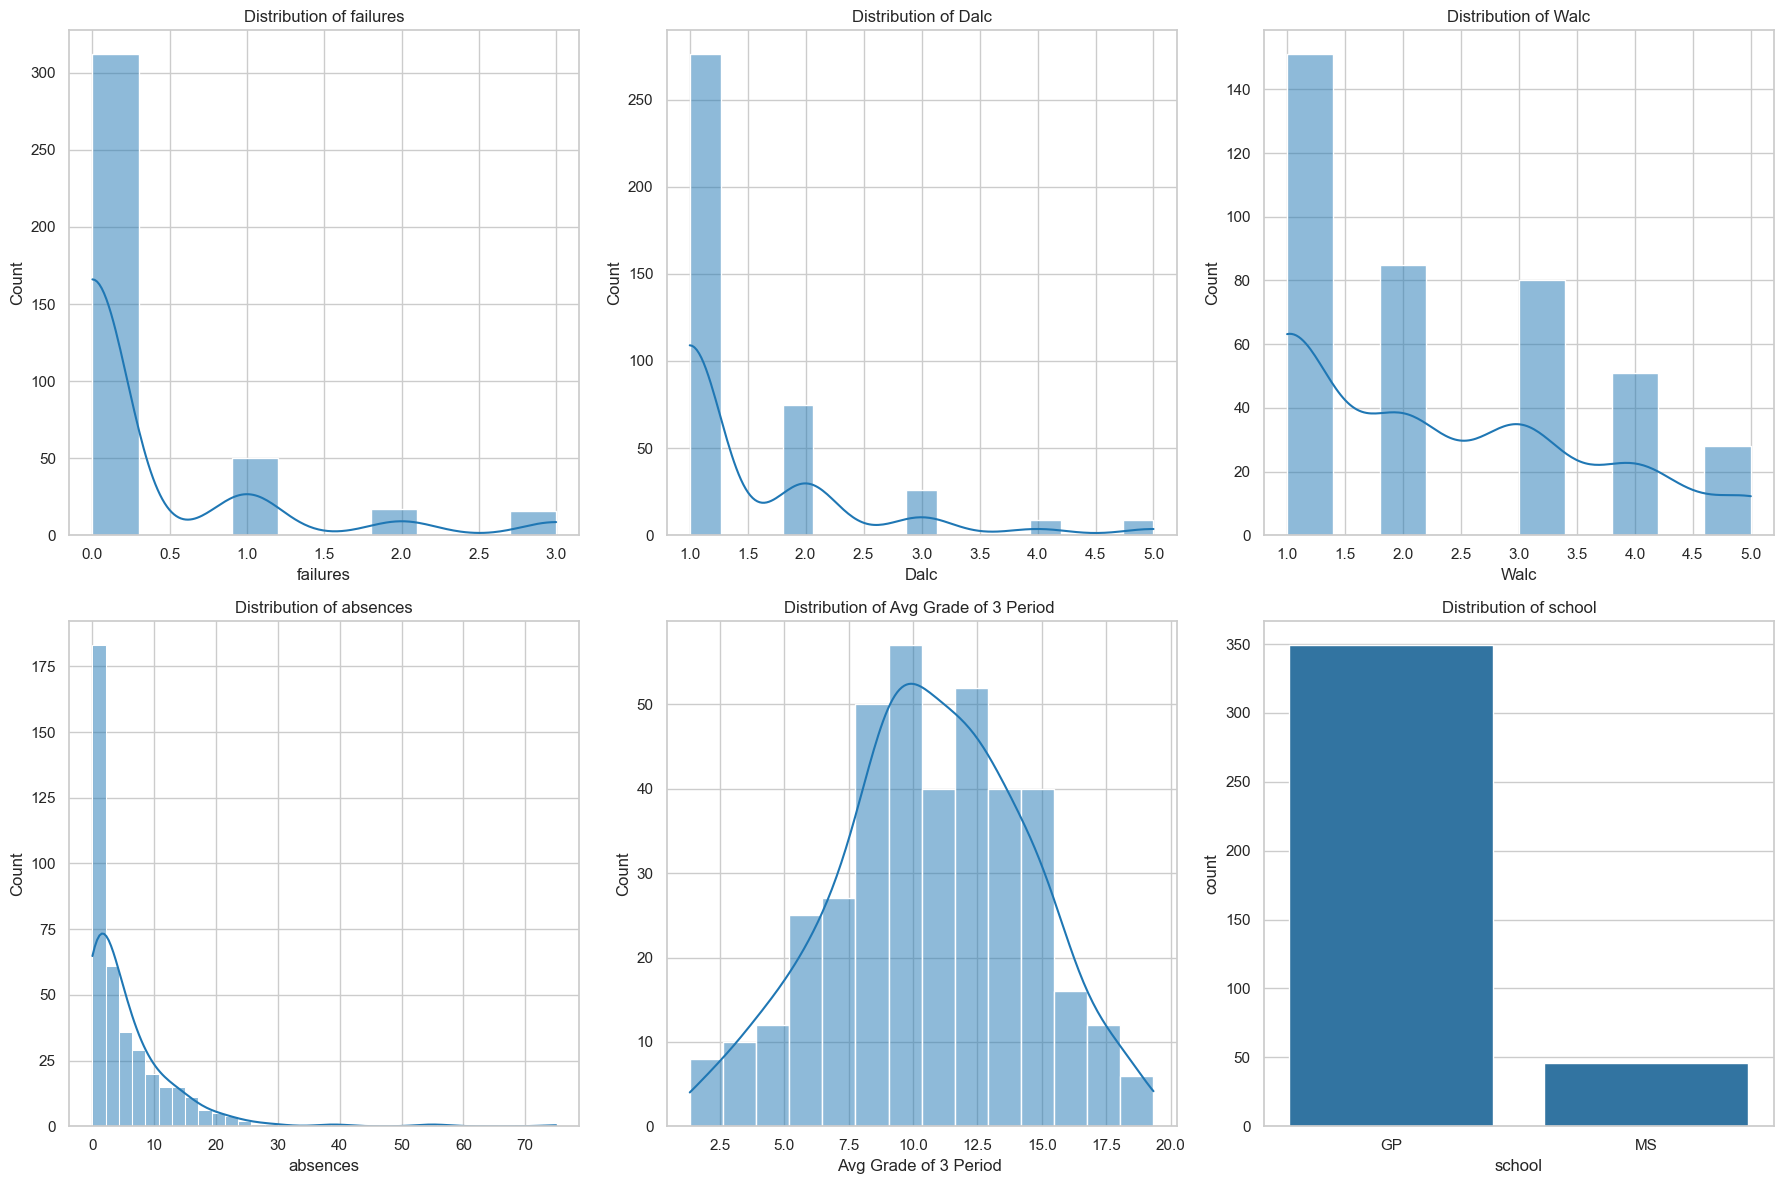

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define RGBA color for uniformity - you may adjust the values as needed
uniform_color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1)  # RGBA for seaborn's default blue

# Plot the histograms
plt.figure(figsize=(18, 12))
columns = ['failures', 'Dalc', 'Walc', 'absences', 'Avg Grade of 3 Period ', 'school']

for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    if column != 'school':
        sns.histplot(data[column], kde=True, color=uniform_color)
    else:
        sns.countplot(x=data[column], color=uniform_color)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

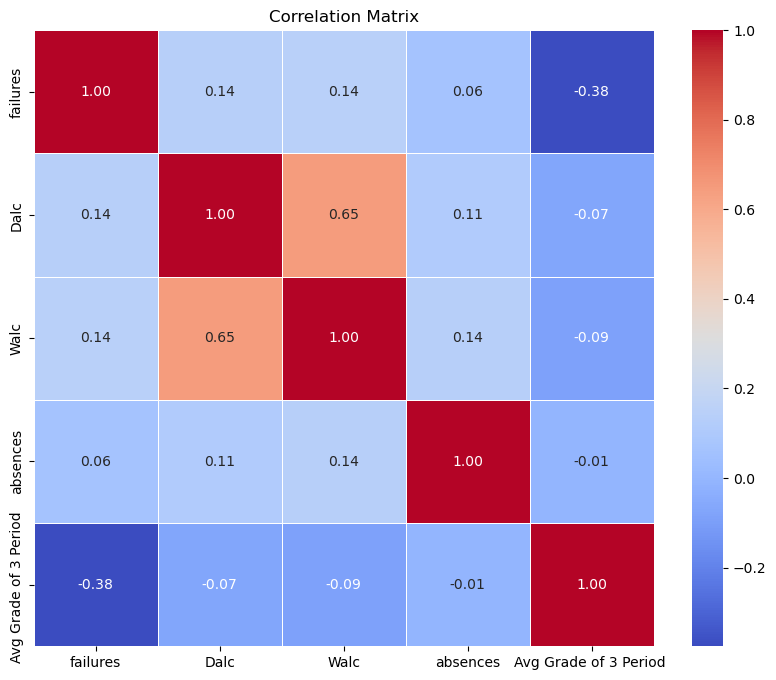

In [12]:
# Correlation analysis
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

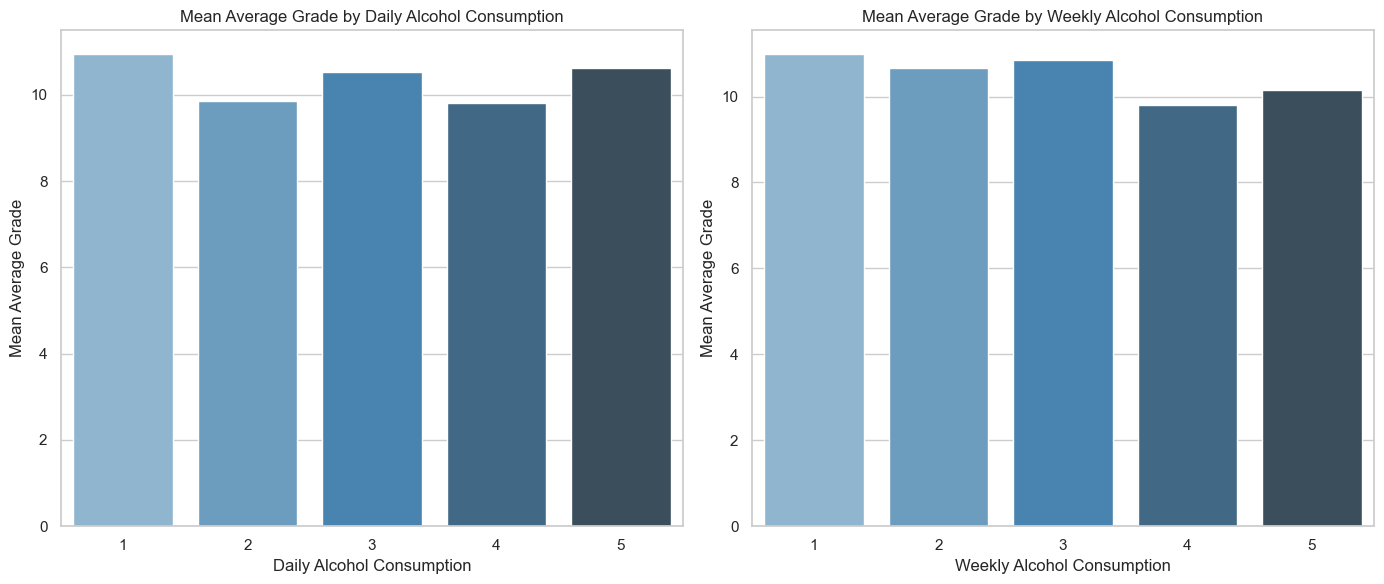

In [20]:
# Calculating the mean average grade for each level of workday and weekend alcohol consumption
mean_grade_by_dalc = data.groupby('Dalc')['Avg Grade of 3 Period '].mean().reset_index()
mean_grade_by_walc = data.groupby('Walc')['Avg Grade of 3 Period '].mean().reset_index()

# Setting up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plotting the mean average grade by workday alcohol consumption
plt.subplot(1, 2, 1)
sns.barplot(x='Dalc', y='Avg Grade of 3 Period ', data=mean_grade_by_dalc, palette="Blues_d")
plt.title('Mean Average Grade by Workday Alcohol Consumption')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Mean Average Grade')

# Plotting the mean average grade by weekend alcohol consumption
plt.subplot(1, 2, 2)
sns.barplot(x='Walc', y='Avg Grade of 3 Period ', data=mean_grade_by_walc, palette="Blues_d")
plt.title('Mean Average Grade by weekend Alcohol Consumption')
plt.xlabel('weekend Alcohol Consumption')
plt.ylabel('Mean Average Grade')

plt.tight_layout()
plt.show()